
# Regression kriging

An example of regression kriging


In [31]:
import sys

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

from pykrige.rk import RegressionKriging

import numpy as np
from matplotlib import pyplot as plt

In [8]:
svr_model = SVR(C=0.1, gamma="auto")
rf_model = RandomForestRegressor(n_estimators=100)
lr_model = LinearRegression(copy_X=True, fit_intercept=False)

models = [svr_model, rf_model, lr_model]

try:
    housing = fetch_california_housing()
except PermissionError:
    # this dataset can occasionally fail to download on Windows
    sys.exit(0)

# take the first 5000 as Kriging is memory intensive
p = housing["data"][:5000, :-2]
x = housing["data"][:5000, -2:]
target = housing["target"][:5000]

p_train, p_test, x_train, x_test, target_train, target_test = train_test_split(
    p, x, target, test_size=0.3, random_state=42
)

In [9]:
p.shape, x.shape, target.shape

((5000, 6), (5000, 2), (5000,))

In [10]:
for m in models:
    print("=" * 40)
    print("regression model:", m.__class__.__name__)
    m_rk = RegressionKriging(regression_model=m, n_closest_points=10)
    m_rk.fit(p_train, x_train, target_train)
    print("Regression Score: ", m_rk.regression_model.score(p_test, target_test))
    print("RK score: ", m_rk.score(p_test, x_test, target_test))

regression model: SVR
Finished learning regression model
Finished kriging residuals
Regression Score:  -0.03405385545291484
RK score:  0.665098484157779
regression model: RandomForestRegressor
Finished learning regression model
Finished kriging residuals
Regression Score:  0.6990713086885232
RK score:  0.7401864492788699
regression model: LinearRegression
Finished learning regression model
Finished kriging residuals
Regression Score:  0.5277968398381674
RK score:  0.6034668706398844


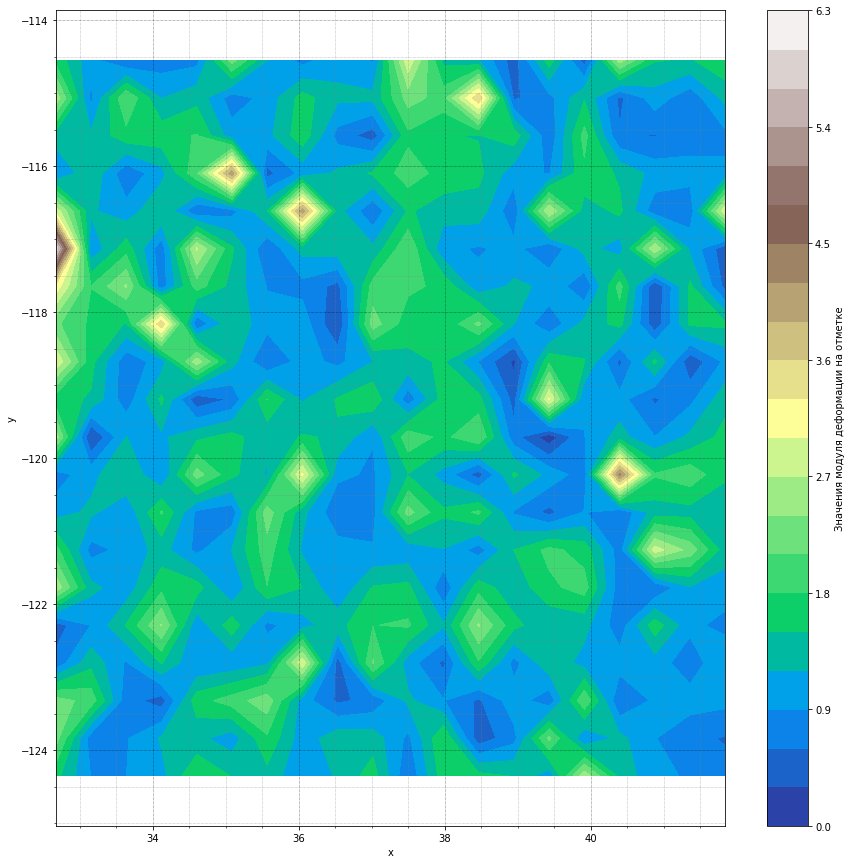

In [33]:
x_new = np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), 20)
y_new = np.linspace(np.min(x_train[:, 1]), np.max(x_train[:, 1]), 20)
X, Y = np.meshgrid(x_new, y_new)

z_new = np.reshape(m_rk.predict(p_test[:400], np.array([Y.reshape(-1), X.reshape(-1)]).T), (20, 20))
    
    
plt.figure(figsize=(15, 15))
# Добавляем основную сетку
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
    # Добавляем дополнительную сетку
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    # Включаем дополнительные деления на осях
plt.minorticks_on()
# Сохранение пропорций X Y
plt.axis('equal')    
plt.contourf(X, Y, z_new, cmap='terrain', levels=20)
cbar = plt.colorbar()
cbar.set_label(f'Значения модуля деформации на отметке')

plt.xlabel('x')
plt.ylabel('y')
plt.show()